In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:/Data science/DATA SETS/Digit recogniser_kaggle/train.csv")

In [3]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = df.iloc[:,1:].values
y = df['label'].values

In [5]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
x.shape

(42000, 784)

In [7]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

## Split train test data


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =12)

In [10]:
X_train.shape

(33600, 784)

In [11]:
X_test.shape

(8400, 784)

In [12]:
y_train.shape

(33600,)

In [13]:
def plot_image_color(img):
    img=img.reshape((28,28))
    plt.imshow(img) #this function gives u acolor map 
    plt.show()

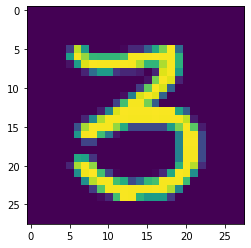

In [14]:
plot_image_color(X_train[60])


In [15]:
y_train[60]

3

In [16]:
def gray_img(img):
    plt.imshow(img.reshape((28,28)),cmap='gray')
    plt.show()

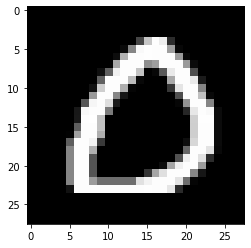

In [17]:
gray_img(X_train[66])

In [18]:
from sklearn.svm import SVC

In [19]:
log_reg = SVC()
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9763095238095238

In [20]:
test_data = pd.read_csv("F:/Data science/DATA SETS/Digit recogniser_kaggle/test.csv")

In [21]:
test = test_data.values

In [22]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

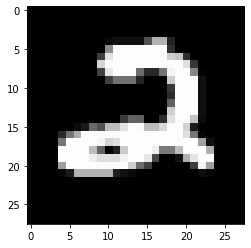

In [23]:
gray_img(test[0])

In [ ]:
pred_results = log_reg.predict(test)

In [ ]:
results=pd.DataFrame({'ImageId': list(range(1, pred_results.shape[0]+1)) ,
                      'Label' : pred_results})
#results.columns = ['Label']
results.to_csv("digit_predictions.csv",index = False)

In [ ]:
results.shape

In [ ]:
results

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [ ]:
model_params = {
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,5,10]
        }
    },
    'svm': {
        'model':svm.SVC(gamma='auto'),
        'params': {
            'c' : [1,10,20],
            'kernal' : ['rbf','linear']
        }
    },
    'log_reg' : {
        'model':LogisticRegression(),
        'params':{
            'c':[1,5,10]
        }
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df